In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Data manipulation
import numpy as np

# Plotting 
import matplotlib.pyplot as plt

# Statistical calculation
from scipy.stats import norm

# Data fetching (Stock prices)
import yfinance as yf #can use other free APIs also

# Time
import datetime as dt

In [13]:
tickers = ['AAPL', 'KO', 'C', 'DIS','F','MSFT' , 'MS', 'GME', 'TSLA' , 'AMZN'] # a stock symbol, Apple's stock symbol is "AAPL"
weights = np.array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1, 0.1 , 0.1 , 0.1 , 0.1]) # weightage of each stock in my portfolio, taken all equal here

In [19]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = yf.download(tickers,start,end)['Adj Close'] #only interested in adjusted closing price
df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,GME,KO,MS,MSFT,TSLA
Date,,,,,,,,,,
2020-01-02,73.449394,94.900497,72.126274,148.199997,8.395803,1.577500,49.683178,47.284863,155.761795,28.684000
2020-01-03,72.735306,93.748497,70.767738,146.500000,8.208637,1.470000,49.412121,46.521622,153.822281,29.534000
2020-01-06,73.314880,95.143997,70.545753,145.649994,8.164074,1.462500,49.394051,46.358067,154.219925,30.102667
2020-01-07,72.970078,95.343002,69.933098,145.699997,8.244287,1.380000,49.014591,46.267204,152.813751,31.270666
2020-01-08,74.143913,94.598503,70.465866,145.399994,8.244287,1.430000,49.104939,46.857803,155.247833,32.809334
...,...,...,...,...,...,...,...,...,...,...
2023-04-18,166.470001,102.300003,50.080002,100.930000,12.730000,21.610001,63.560001,89.849998,288.369995,184.309998
2023-04-19,167.630005,104.300003,50.400002,98.750000,12.220000,21.309999,63.680000,90.449997,288.450012,180.589996
2023-04-20,166.649994,103.809998,49.400002,98.070000,11.870000,20.219999,63.959999,90.430000,286.109985,162.990005


In [20]:
returns = df.pct_change() #daily percentage change of adj closing price, observe that first column is NaN
returns

,AAPL,AMZN,C,DIS,F,GME,KO,MS,MSFT,TSLA
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.018836,-0.011471,-0.022293,-0.068146,-0.005456,-0.016141,-0.012452,0.029633
2020-01-06,0.007968,0.014886,-0.003137,-0.005802,-0.005429,-0.005102,-0.000366,-0.003516,0.002585,0.019255
2020-01-07,-0.004703,0.002092,-0.008685,0.000343,0.009825,-0.056410,-0.007682,-0.001960,-0.009118,0.038801
2020-01-08,0.016087,-0.007809,0.007618,-0.002059,0.000000,0.036232,0.001843,0.012765,0.015928,0.049205
...,...,...,...,...,...,...,...,...,...,...
2023-04-18,0.007505,-0.004283,0.007849,0.006281,0.003943,-0.030072,0.001576,0.006272,-0.001489,-0.014596
2023-04-19,0.006968,0.019550,0.006390,-0.021599,-0.040063,-0.013883,0.001888,0.006678,0.000277,-0.020183
2023-04-20,-0.005846,-0.004698,-0.019841,-0.006886,-0.028642,-0.051150,0.004397,-0.000221,-0.008112,-0.097458


In [22]:
cov_matrix = returns.cov() #var-covar matrix of returns
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,KO,MS,MSFT,TSLA
AAPL,0.000511,0.000361,0.000296,0.000270,0.000290,0.000408,0.000167,0.000314,0.000390,0.000529
AMZN,0.000361,0.000602,0.000206,0.000269,0.000230,0.000340,0.000100,0.000225,0.000371,0.000518
C,0.000296,0.000206,0.000794,0.000428,0.000523,0.000499,0.000233,0.000586,0.000284,0.000392
DIS,0.000270,0.000269,0.000428,0.000553,0.000404,0.000326,0.000184,0.000383,0.000275,0.000383
F,0.000290,0.000230,0.000523,0.000404,0.000937,0.000632,0.000206,0.000474,0.000266,0.000514
GME,0.000408,0.000340,0.000499,0.000326,0.000632,0.011972,0.000097,0.000336,0.000310,0.000898
KO,0.000167,0.000100,0.000233,0.000184,0.000206,0.000097,0.000225,0.000215,0.000161,0.000145
MS,0.000314,0.000225,0.000586,0.000383,0.000474,0.000336,0.000215,0.000629,0.000302,0.000381
MSFT,0.000390,0.000371,0.000284,0.000275,0.000266,0.000310,0.000161,0.000302,0.000465,0.000476
TSLA,0.000529,0.000518,0.000392,0.000383,0.000514,0.000898,0.000145,0.000381,0.000476,0.002041


In [23]:
avg_returns = returns.mean() #expected value of returns
avg_returns

AAPL    0.001231
AMZN    0.000436
C      -0.000066
DIS    -0.000201
F       0.000910
GME     0.008062
KO      0.000416
MS      0.001089
MSFT    0.000945
TSLA    0.003106
dtype: float64

In [24]:
count = returns.count()[0] #number of rows
count

832

In [30]:
port_mean = avg_returns @ weights #matrix multiplication
port_std = np.sqrt(weights.T @ cov_matrix @ weights) #formula in notes

In [31]:
port_mean

0.0015928200426794312

In [32]:
port_std

0.02234446045441941

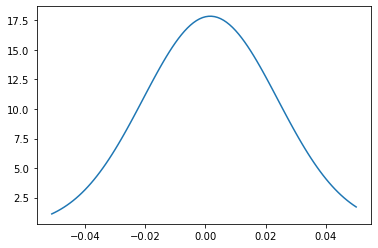

In [33]:
x = np.arange(-0.051,0.051,0.001)  #this is our x-axis, for around 5% confidence interval 
norm_dist = norm.pdf(x, port_mean, port_std)

plt.plot(x, norm_dist)
plt.show()

In [36]:
# calculating var for confidence level of 0.05
confi_lev = 0.05
VaR = norm.ppf(confi_lev , port_mean, port_std) #percent point function (cdf ka inverse)
VaR
#means i have 95% confidence that my portfolio will not lose more than 3.5% in one day

-0.03516054677804609

In [37]:
#calculating confidence interval for a confidence level of 95.5%, Z=2 in this case
# our confidence level is (low,high)

low = port_mean - 2*port_std/np.sqrt(count)
high = port_mean + 2*port_std/np.sqrt(count)

# so, we are 95.5% comfident that our daily portfolio return wil be between low and high

In [38]:
low

4.351046785276637e-05

In [39]:
high

0.003142129617506096